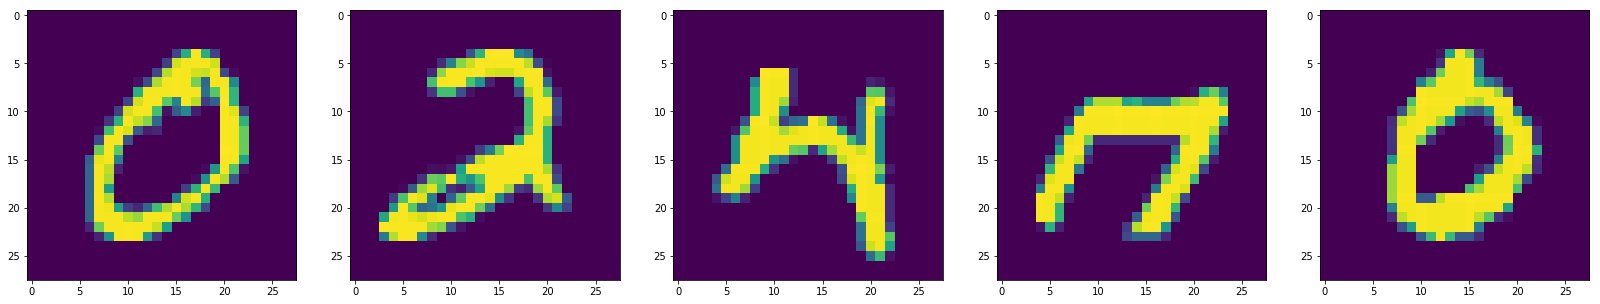

In [153]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
fig=plt.figure(figsize=(28,28))
index = 1
for i in range(0,70000,15000):
    reshaped_array = mnist.data[i].reshape(28,28)
    fig.add_subplot(1,5, index)
    plt.imshow(reshaped_array)
    index += 1

In [167]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm

iris_data = np.loadtxt('iris.data',delimiter=',')
n = 5 # Total number of folds
result = []
for iter in range(0,n):
    x_test = iris_data[iter::n,0:4]
    y_test = iris_data[iter::n,4:]
    dataset_train = np.delete(iris_data, list(range(iter, iris_data.shape[0], n)), axis=0)
    x_train = dataset_train[:,0:4]
    y_train = dataset_train[:,4:]
    model = svm.SVC(kernel='linear')
    model.fit(x_train,y_train.ravel())
    y_predicted=model.predict(x_test)
    result.append(np.mean(y_test.transpose() == y_predicted))
print(result)
print("Accuracy on iris data using SVM: %0.4f (+/- %0.4f)" % (np.mean(result), np.std(result)))

[1.0, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0]
Accuracy on iris data using SVM: 0.9800 (+/- 0.0163)


In [202]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier

iris_data = np.loadtxt('iris.data',delimiter=',')
n = 5 # Total number of folds
result = []
for iter in range(0,n):
    x_test = iris_data[iter::n,0:4]
    y_test = iris_data[iter::n,4:]
    dataset_train = np.delete(iris_data, list(range(iter, iris_data.shape[0], n)), axis=0)
    x_train = dataset_train[:,0:4]
    y_train = dataset_train[:,4:]
    model = RandomForestClassifier(n_estimators=14)
    model.fit(x_train,y_train.ravel())
    y_predicted=model.predict(x_test)
    result.append(np.mean(y_test.transpose() == y_predicted))
print(result)
print("Accuracy on iris data using RF: %0.4f (+/- %0.4f)" % (np.mean(result), np.std(result)))

[0.9666666666666667, 0.9666666666666667, 0.9, 0.9666666666666667, 0.9333333333333333]
Accuracy on iris data using RF: 0.9467 (+/- 0.0267)


In [184]:
from sklearn import metrics, model_selection 
wine_train = np.loadtxt('wine.train',delimiter=',')
wine_test = np.loadtxt('wine.test',delimiter=',')
x_train = wine_train[:,1:]
y_train = np.int32(wine_train[:,0:1])
x_test = wine_test[:,1:]

In [191]:
#Evaluating a linear SVM model 
CV=10
scores = model_selection.cross_val_score(svm.SVC(kernel='poly'), x_train, y_train.ravel(), cv=CV)

print("Accuracy on wine data: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
#Maximum accuracy seen 95% with deviation of 7.64%

Accuracy on wine data: 0.9500 (+/- 0.0764)


In [196]:
scores = model_selection.cross_val_score(RandomForestClassifier(n_estimators=25), x_train, y_train.ravel(), cv=CV)
print("Accuracy on wine data: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
#Maximum average Accuracy seen 96.67% with standard deviation 5.53%

Accuracy on wine data: 0.9667 (+/- 0.0553)


In [201]:
#MLPClassifier Evaluation
from sklearn.neural_network import MLPClassifier

print(x_train.shape)
scores = model_selection.cross_val_score(MLPClassifier(hidden_layer_sizes=(120,120,120)), x_train, y_train.ravel(), cv=CV)
print("Accuracy on wine data: %0.4f (+/- %0.4f)" % (scores.mean(), scores.std()))
#Max average accuracy seen 45.00% with a standard deviation of 14.53%

(120, 12)
Accuracy on wine data: 0.4417 (+/- 0.1539)


In [199]:
#Choosing Random forest classifier and training the dataset
import pandas as panda
model = RandomForestClassifier(n_estimators=24)
model.fit(x_train,y_train.ravel())
print(x_test.shape)
y_predicted=model.predict(x_test)
print(y_predicted.shape)
panda.DataFrame(y_predicted, columns=['wine_class']).to_csv('wine_predict.csv',index=False) #To write to CSV

(58, 12)
(58,)
